In [ ]:
import pandas as pd
x=pd.read_csv("/content/drive/MyDrive/finaldataset.csv")
x.tail(10)

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
910,51,0,4,114.0,258.0,1.0,2.0,96.0,0.0,1.0,1.0,NaN,NaN,0
911,62,1,4,160.0,254.0,1.0,1.0,108.0,1.0,3.0,2.0,NaN,NaN,1
912,53,1,4,144.0,300.0,1.0,1.0,128.0,1.0,1.5,2.0,NaN,NaN,1
913,62,1,4,158.0,170.0,0.0,1.0,138.0,1.0,0.0,NaN,NaN,NaN,1
914,46,1,4,134.0,310.0,0.0,0.0,126.0,0.0,0.0,NaN,NaN,3.0,1
915,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62,1,1,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,1
918,58,1,4,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
919,62,1,2,120.0,254.0,0.0,2.0,93.0,1.0,0.0,NaN,NaN,NaN,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
scaling.fit_transform(x[["num"]])

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],

In [ ]:
x.isnull().sum()

Age                    0
Sex                    0
ChestPainType          0
RestBloodPressure     59
Chol                  30
fbs                   90
restecg                2
thalach               55
exang                 55
oldpeak               62
slope                309
ca                   610
thal                 486
num                    0
dtype: int64

In [ ]:
#filling missing data using kNN

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=6)
#imputed = imputer.fit_transform(x[['RestBloodPressure','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
imputed = imputer.fit_transform(x)
#df_imputed = pd.DataFrame(imputed, columns=x.columns)
imputed

array([[63.        ,  1.        ,  1.        , ...,  0.        ,
         6.        ,  0.        ],
       [67.        ,  1.        ,  4.        , ...,  3.        ,
         3.        ,  1.        ],
       [67.        ,  1.        ,  4.        , ...,  2.        ,
         7.        ,  1.        ],
       ...,
       [55.        ,  1.        ,  4.        , ...,  0.33333333,
         6.        ,  1.        ],
       [58.        ,  1.        ,  4.        , ...,  0.83333333,
         5.5       ,  0.        ],
       [62.        ,  1.        ,  2.        , ...,  1.        ,
         6.33333333,  1.        ]])

In [ ]:
#imputed.isNaN().sum()
x_imputed = pd.DataFrame(imputed, columns=x.columns)
x_imputed

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.000000,0.000000,2.300000,3.000000,0.000000,6.000000,0.0
1,67.0,1.0,4.0,160.000000,286.0,0.0,2.0,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,1.0
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1.0
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.000000,0.000000,3.500000,3.000000,0.000000,3.000000,0.0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.000000,0.000000,1.400000,1.000000,0.000000,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.166667,0.500000,4.333333,1.0
916,62.0,1.0,1.0,135.666667,139.0,0.0,1.0,118.666667,0.333333,0.333333,1.833333,0.833333,5.666667,0.0
917,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.833333,0.333333,6.000000,1.0
918,58.0,1.0,4.0,139.000000,385.0,1.0,2.0,123.333333,0.333333,0.500000,2.000000,0.833333,5.500000,0.0


In [ ]:
x_imputed.tail(10)

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
910,51.0,0.0,4.0,114.000000,258.0,1.0,2.0,96.000000,0.000000,1.000000,1.000000,1.333333,6.333333,0.0
911,62.0,1.0,4.0,160.000000,254.0,1.0,1.0,108.000000,1.000000,3.000000,2.000000,0.833333,6.000000,1.0
912,53.0,1.0,4.0,144.000000,300.0,1.0,1.0,128.000000,1.000000,1.500000,2.000000,1.333333,5.666667,1.0
913,62.0,1.0,4.0,158.000000,170.0,0.0,1.0,138.000000,1.000000,0.000000,2.500000,1.333333,6.166667,1.0
914,46.0,1.0,4.0,134.000000,310.0,0.0,0.0,126.000000,0.000000,0.000000,1.833333,1.333333,3.000000,1.0
915,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.166667,0.500000,4.333333,1.0
916,62.0,1.0,1.0,135.666667,139.0,0.0,1.0,118.666667,0.333333,0.333333,1.833333,0.833333,5.666667,0.0
917,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.833333,0.333333,6.000000,1.0
918,58.0,1.0,4.0,139.000000,385.0,1.0,2.0,123.333333,0.333333,0.500000,2.000000,0.833333,5.500000,0.0
919,62.0,1.0,2.0,120.000000,254.0,0.0,2.0,93.000000,1.000000,0.000000,2.000000,1.000000,6.333333,1.0


In [ ]:
!pip install missingpy

     |████████████████████████████████| 49 kB 3.0 MB/s 


In [ ]:
#filling missing values using random forest
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest()
xrf_imputed = imputer.fit_transform(x)
xrf_imputed

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 2


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 3


array([[63.  ,  1.  ,  1.  , ...,  0.  ,  6.  ,  0.  ],
       [67.  ,  1.  ,  4.  , ...,  3.  ,  3.  ,  1.  ],
       [67.  ,  1.  ,  4.  , ...,  2.  ,  7.  ,  1.  ],
       ...,
       [55.  ,  1.  ,  4.  , ...,  1.24,  6.  ,  1.  ],
       [58.  ,  1.  ,  4.  , ...,  1.8 ,  4.57,  0.  ],
       [62.  ,  1.  ,  2.  , ...,  1.31,  5.21,  1.  ]])

In [ ]:
xrff_imputed = pd.DataFrame(xrf_imputed, columns=x.columns)
xrff_imputed

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.00,233.0,1.0,2.0,150.00,0.00,2.3,3.00,0.00,6.00,0.0
1,67.0,1.0,4.0,160.00,286.0,0.0,2.0,108.00,1.00,1.5,2.00,3.00,3.00,1.0
2,67.0,1.0,4.0,120.00,229.0,0.0,2.0,129.00,1.00,2.6,2.00,2.00,7.00,1.0
3,37.0,1.0,3.0,130.00,250.0,0.0,0.0,187.00,0.00,3.5,3.00,0.00,3.00,0.0
4,41.0,0.0,2.0,130.00,204.0,0.0,2.0,172.00,0.00,1.4,1.00,0.00,3.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.00,333.0,1.0,1.0,154.00,0.00,0.0,1.41,1.24,4.08,1.0
916,62.0,1.0,1.0,134.86,139.0,0.0,1.0,117.34,0.21,0.0,1.84,0.57,5.75,0.0
917,55.0,1.0,4.0,122.00,223.0,1.0,1.0,100.00,0.00,0.0,1.78,1.24,6.00,1.0
918,58.0,1.0,4.0,149.37,385.0,1.0,2.0,126.52,0.19,0.0,1.50,1.80,4.57,0.0


In [ ]:
xrff_imputed.tail(10)

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
910,51.0,0.0,4.0,114.00,258.0,1.0,2.0,96.00,0.00,1.0,1.00,1.24,4.31,0.0
911,62.0,1.0,4.0,160.00,254.0,1.0,1.0,108.00,1.00,3.0,2.00,1.67,6.33,1.0
912,53.0,1.0,4.0,144.00,300.0,1.0,1.0,128.00,1.00,1.5,2.00,1.15,6.80,1.0
913,62.0,1.0,4.0,158.00,170.0,0.0,1.0,138.00,1.00,0.0,1.90,1.03,6.18,1.0
914,46.0,1.0,4.0,134.00,310.0,0.0,0.0,126.00,0.00,0.0,1.66,1.42,3.00,1.0
915,54.0,0.0,4.0,127.00,333.0,1.0,1.0,154.00,0.00,0.0,1.41,1.24,4.08,1.0
916,62.0,1.0,1.0,134.86,139.0,0.0,1.0,117.34,0.21,0.0,1.84,0.57,5.75,0.0
917,55.0,1.0,4.0,122.00,223.0,1.0,1.0,100.00,0.00,0.0,1.78,1.24,6.00,1.0
918,58.0,1.0,4.0,149.37,385.0,1.0,2.0,126.52,0.19,0.0,1.50,1.80,4.57,0.0
919,62.0,1.0,2.0,120.00,254.0,0.0,2.0,93.00,1.00,0.0,1.80,1.31,5.21,1.0


In [ ]:
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.impute import IterativeImputer
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman')

In [ ]:
x_mice=imp.fit_transform(x)
x_mice

[IterativeImputer] Completing matrix with shape (920, 14)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.11
[IterativeImputer] Change: 96.87131498325323, scaled tolerance: 6.03e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.18
[IterativeImputer] Change: 23.033417365327637, scaled tolerance: 6.03e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.24
[IterativeImputer] Change: 3.416298809954183, scaled tolerance: 6.03e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.30
[IterativeImputer] Change: 1.0822742533231868, scaled tolerance: 6.03e-08 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.34
[IterativeImputer] Change: 0.5170180854459352, scaled tolerance: 6.03e-08 
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.45
[IterativeImputer] Change: 0.19710097804608284, scaled tolerance: 6.03e-08 
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.54
[IterativeImputer] Chang

array([[63.        ,  1.        ,  1.        , ...,  0.        ,
         6.        ,  0.        ],
       [67.        ,  1.        ,  4.        , ...,  3.        ,
         3.        ,  1.        ],
       [67.        ,  1.        ,  4.        , ...,  2.        ,
         7.        ,  1.        ],
       ...,
       [55.        ,  1.        ,  4.        , ...,  1.31631052,
         6.        ,  1.        ],
       [58.        ,  1.        ,  4.        , ...,  0.76716705,
         5.24881029,  0.        ],
       [62.        ,  1.        ,  2.        , ...,  0.92621851,
         5.60474392,  1.        ]])

In [ ]:
x_miice = pd.DataFrame(x_mice,columns=x.columns)
x_miice

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.000000,0.000000,2.300000,3.000000,0.000000,6.000000,0.0
1,67.0,1.0,4.0,160.000000,286.0,0.0,2.0,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,1.0
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1.0
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.000000,0.000000,3.500000,3.000000,0.000000,3.000000,0.0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.000000,0.000000,1.400000,1.000000,0.000000,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.613452,1.313957,4.944292,1.0
916,62.0,1.0,1.0,133.848953,139.0,0.0,1.0,145.803298,-0.058067,0.419176,1.427657,0.352011,3.890762,0.0
917,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.893617,1.316311,6.000000,1.0
918,58.0,1.0,4.0,141.287095,385.0,1.0,2.0,146.746183,0.356625,0.877647,1.680787,0.767167,5.248810,0.0


In [ ]:
x_miice.tail(10)

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
910,51.0,0.0,4.0,114.000000,258.0,1.0,2.0,96.000000,0.000000,1.000000,1.000000,1.046335,3.583322,0.0
911,62.0,1.0,4.0,160.000000,254.0,1.0,1.0,108.000000,1.000000,3.000000,2.000000,1.703428,7.259208,1.0
912,53.0,1.0,4.0,144.000000,300.0,1.0,1.0,128.000000,1.000000,1.500000,2.000000,1.262637,6.925162,1.0
913,62.0,1.0,4.0,158.000000,170.0,0.0,1.0,138.000000,1.000000,0.000000,1.569805,0.995321,6.131218,1.0
914,46.0,1.0,4.0,134.000000,310.0,0.0,0.0,126.000000,0.000000,0.000000,1.363633,0.744578,3.000000,1.0
915,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.613452,1.313957,4.944292,1.0
916,62.0,1.0,1.0,133.848953,139.0,0.0,1.0,145.803298,-0.058067,0.419176,1.427657,0.352011,3.890762,0.0
917,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.893617,1.316311,6.000000,1.0
918,58.0,1.0,4.0,141.287095,385.0,1.0,2.0,146.746183,0.356625,0.877647,1.680787,0.767167,5.248810,0.0
919,62.0,1.0,2.0,120.000000,254.0,0.0,2.0,93.000000,1.000000,0.000000,1.927384,0.926219,5.604744,1.0


In [ ]:
#filling missing data using mean value
import numpy as np
x["thal"]=x["thal"].replace(np.NaN,x["thal"].mean())
x["thal"][:20]

0     6.0
1     3.0
2     7.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     7.0
9     7.0
10    6.0
11    3.0
12    6.0
13    7.0
14    7.0
15    3.0
16    7.0
17    3.0
18    3.0
19    3.0
Name: thal, dtype: float64

In [ ]:
x["ca"]=x["ca"].replace(np.NaN,x["ca"].mean())
x["ca"][:20]

0     0.0
1     3.0
2     2.0
3     0.0
4     0.0
5     0.0
6     2.0
7     0.0
8     1.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: ca, dtype: float64

In [ ]:
x["slope"]=x["slope"].replace(np.NaN,x["slope"].mean())
x["slope"][:20]

0     3.0
1     2.0
2     2.0
3     3.0
4     1.0
5     1.0
6     3.0
7     1.0
8     2.0
9     3.0
10    2.0
11    2.0
12    2.0
13    1.0
14    1.0
15    1.0
16    3.0
17    1.0
18    1.0
19    1.0
Name: slope, dtype: float64

In [ ]:
x["oldpeak"]=x["oldpeak"].replace(np.NaN,x["oldpeak"].mean())
x["oldpeak"][:20]

0     2.3
1     1.5
2     2.6
3     3.5
4     1.4
5     0.8
6     3.6
7     0.6
8     1.4
9     3.1
10    0.4
11    1.3
12    0.6
13    0.0
14    0.5
15    1.6
16    1.0
17    1.2
18    0.2
19    0.6
Name: oldpeak, dtype: float64

In [ ]:
x["fbs"]=x["fbs"].replace(np.NaN,x["fbs"].mean())
x["fbs"][:20]

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    1.0
13    0.0
14    1.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: fbs, dtype: float64

In [ ]:
x["RestBloodPressure"]=x["RestBloodPressure"].replace(np.NaN,x["RestBloodPressure"].mean())
x["RestBloodPressure"][:20]

0     145.0
1     160.0
2     120.0
3     130.0
4     130.0
5     120.0
6     140.0
7     120.0
8     130.0
9     140.0
10    140.0
11    140.0
12    130.0
13    120.0
14    172.0
15    150.0
16    110.0
17    140.0
18    130.0
19    130.0
Name: RestBloodPressure, dtype: float64

In [ ]:
x["restecg"]=x["restecg"].replace(np.NaN,x["restecg"].mean())
x["restecg"][:20]

0     2.0
1     2.0
2     2.0
3     0.0
4     2.0
5     0.0
6     2.0
7     0.0
8     2.0
9     2.0
10    0.0
11    2.0
12    2.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: restecg, dtype: float64

In [ ]:
x["thalach"]=x["thalach"].replace(np.NaN,x["thalach"].mean())
x["thalach"][:20]

0     150.0
1     108.0
2     129.0
3     187.0
4     172.0
5     178.0
6     160.0
7     163.0
8     147.0
9     155.0
10    148.0
11    153.0
12    142.0
13    173.0
14    162.0
15    174.0
16    168.0
17    160.0
18    139.0
19    171.0
Name: thalach, dtype: float64

In [ ]:
x["exang"]=x["exang"].replace(np.NaN,x["exang"].mean())
x["exang"][:20]

0     0.0
1     1.0
2     1.0
3     0.0
4     0.0
5     0.0
6     0.0
7     1.0
8     0.0
9     1.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: exang, dtype: float64

In [ ]:
x["Chol"]=x["Chol"].replace(np.NaN,x["Chol"].mean())
x["Chol"][:20]

0     233.0
1     286.0
2     229.0
3     250.0
4     204.0
5     236.0
6     268.0
7     354.0
8     254.0
9     203.0
10    192.0
11    294.0
12    256.0
13    263.0
14    199.0
15    168.0
16    229.0
17    239.0
18    275.0
19    266.0
Name: Chol, dtype: float64

In [ ]:
x.tail(10)

,Age,Sex,ChestPainType,RestBloodPressure,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
910,51,0,4,114.000000,258.0,1.0,2.0,96.000000,0.000000,1.000000,1.000000,0.703226,5.087558,0
911,62,1,4,160.000000,254.0,1.0,1.0,108.000000,1.000000,3.000000,2.000000,0.703226,5.087558,1
912,53,1,4,144.000000,300.0,1.0,1.0,128.000000,1.000000,1.500000,2.000000,0.703226,5.087558,1
913,62,1,4,158.000000,170.0,0.0,1.0,138.000000,1.000000,0.000000,1.770867,0.703226,5.087558,1
914,46,1,4,134.000000,310.0,0.0,0.0,126.000000,0.000000,0.000000,1.770867,0.703226,3.000000,1
915,54,0,4,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.770867,0.703226,5.087558,1
916,62,1,1,132.132404,139.0,0.0,1.0,137.545665,0.389595,0.878788,1.770867,0.703226,5.087558,0
917,55,1,4,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.770867,0.703226,6.000000,1
918,58,1,4,132.132404,385.0,1.0,2.0,137.545665,0.389595,0.878788,1.770867,0.703226,5.087558,0
919,62,1,2,120.000000,254.0,0.0,2.0,93.000000,1.000000,0.000000,1.770867,0.703226,5.087558,1


In [ ]:
!pip install -q hvplot

     |████████████████████████████████| 3.1 MB 7.4 MB/s 


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
#through mean
from sklearn.model_selection import train_test_split

X = x.drop('num', axis=1)
y = x.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#through mice
from sklearn.model_selection import train_test_split

X = x_miice.drop('num', axis=1)
y = x_miice.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgboost

In [ ]:
from xgboost import XGBClassifier

#xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=100,loss="deviance")
model_XGBclassifier=xgb_clf.fit(X_train, y_train)
pred_xg = model_XGBclassifier.predict(X_test)
acc_xg = accuracy_score(y_test, pred_xg)  # evaluating accuracy score
print('accuracy score of XGB Classifier is:', acc_xg * 100)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

accuracy score of XGB Classifier is: 90.57971014492753
Train Result:
Accuracy Score: 97.98%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.977199    0.982196  0.979814    0.979697      0.979821
recall       0.980392    0.979290  0.979814    0.979841      0.979814
f1-score     0.978793    0.980741  0.979814    0.979767      0.979815
support    306.000000  338.000000  0.979814  644.000000    644.000000
_______________________________________________
Confusion Matrix: 
 [[300   6]
 [  7 331]]

Test Result:
Accuracy Score: 90.58%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.862385    0.934132  0.905797    0.898259      0.906837
recall       0.895238    0.912281  0.905797    0.903759      0.905797
f1-score     0.878505    0.923077  0.905797    0.900791      0.906120
support 

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost Classifier,97.981366,90.57971


SVM

In [ ]:
from sklearn.svm import NuSVC

#svm_clf = SVC(kernel='rbf', gamma=0.1, C=1)

svm_clf = NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.28, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
#svm_clf.fit(X_train, y_train)
model_SVMclassifier=svm_clf.fit(X_train, y_train)
pred_svc = model_SVMclassifier.predict(X_test)
acc_svc = accuracy_score(y_test, pred_svc)  # evaluating accuracy score
print('accuracy score of SVM Classifier is:', acc_svc * 100)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)



accuracy score of SVM Classifier is: 87.68115942028986
Train Result:
Accuracy Score: 91.46%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.925424    0.905444  0.914596    0.915434      0.914938
recall       0.892157    0.934911  0.914596    0.913534      0.914596
f1-score     0.908486    0.919942  0.914596    0.914214      0.914498
support    306.000000  338.000000  0.914596  644.000000    644.000000
_______________________________________________
Confusion Matrix: 
 [[273  33]
 [ 22 316]]

Test Result:
Accuracy Score: 87.68%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.808696    0.925466  0.876812    0.867081      0.881042
recall       0.885714    0.871345  0.876812    0.878530      0.876812
f1-score     0.845455    0.897590  0.876812    0.871522      0.877756
support 

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["SVC", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost Classifier,97.981366,90.579710
1,SVC,91.459627,87.681159


Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad_clf=AdaBoostClassifier(learning_rate=1,n_estimators=50)
#ad_clf.fit(X_train, y_train)
model_adaboostclassifier=ad_clf.fit(X_train, y_train)
pred_ad = model_adaboostclassifier.predict(X_test)
acc_ad = accuracy_score(y_test, pred_ad)  # evaluating accuracy score
print('accuracy score of AdaBoost Classifier is:', acc_ad * 100)
print_score(ad_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ad_clf, X_train, y_train, X_test, y_test, train=False)

accuracy score of AdaBoost Classifier is: 89.13043478260869
Train Result:
Accuracy Score: 95.34%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.953947    0.952941  0.953416    0.953444      0.953419
recall       0.947712    0.958580  0.953416    0.953146      0.953416
f1-score     0.950820    0.955752  0.953416    0.953286      0.953408
support    306.000000  338.000000  0.953416  644.000000    644.000000
_______________________________________________
Confusion Matrix: 
 [[290  16]
 [ 14 324]]

Test Result:
Accuracy Score: 89.13%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.864078    0.907514  0.891304    0.885796      0.890990
recall       0.847619    0.918129  0.891304    0.882874      0.891304
f1-score     0.855769    0.912791  0.891304    0.884280      0.891098
sup

In [ ]:
test_score = accuracy_score(y_test, ad_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ad_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost Classifier,97.981366,90.579710
1,SVC,91.459627,87.681159
2,AdaBoostClassifier,95.341615,89.130435


Gradient boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=3,learning_rate=1)
#gb_clf.fit(X_train, y_train)
model_GradientBoostingclassifier=gb_clf.fit(X_train, y_train)
pred_gd = model_GradientBoostingclassifier.predict(X_test)
acc_gd = accuracy_score(y_test, pred_gd)  # evaluating accuracy score
print('accuracy score of Gradient boosting Classifier is:', acc_gd * 100)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

accuracy score of Gradient boosting Classifier is: 86.59420289855072
Train Result:
Accuracy Score: 94.72%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.947368    0.947059  0.947205    0.947214      0.947206
recall       0.941176    0.952663  0.947205    0.946920      0.947205
f1-score     0.944262    0.949853  0.947205    0.947057      0.947196
support    306.000000  338.000000  0.947205  644.000000    644.000000
_______________________________________________
Confusion Matrix: 
 [[288  18]
 [ 16 322]]

Test Result:
Accuracy Score: 86.59%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.798246    0.913580  0.865942    0.855913      0.869703
recall       0.866667    0.865497  0.865942    0.866082      0.865942
f1-score     0.831050    0.888889  0.865942    0.859970      0.8

In [ ]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost Classifier,97.981366,90.579710
1,SVC,91.459627,87.681159
2,AdaBoostClassifier,95.341615,89.130435
3,GradientBoostingClassifier,94.720497,86.594203


Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#ext_clf=ExtraTreesClassifier()
ext_clf=ExtraTreesClassifier(n_estimators=75)
model_ExtraTreesclassifier=ext_clf.fit(X_train, y_train)
pred_et = model_ExtraTreesclassifier.predict(X_test)
acc_et = accuracy_score(y_test, pred_et)  # evaluating accuracy score
print('accuracy score of Extra Trees Classifier is:', acc_et * 100)
ext_clf.fit(X_train, y_train)
print_score(ext_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ext_clf, X_train, y_train, X_test, y_test, train=False)

accuracy score of Extra Trees Classifier is: 88.40579710144928
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    306.0  338.0       1.0      644.0         644.0
_______________________________________________
Confusion Matrix: 
 [[306   0]
 [  0 338]]

Test Result:
Accuracy Score: 89.49%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.845455    0.927711  0.894928    0.886583      0.896418
recall       0.885714    0.900585  0.894928    0.893150      0.894928
f1-score     0.865116    0.913947  0.894928    0.889531      0.895370
support    105.000000  171.000000  0.894928  276.00000

In [ ]:
test_score = accuracy_score(y_test, ext_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ext_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ExtraTreesClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost Classifier,97.981366,90.579710
1,SVC,91.459627,87.681159
2,AdaBoostClassifier,95.341615,89.130435
3,GradientBoostingClassifier,94.720497,86.594203
4,ExtraTreesClassifier,100.000000,89.492754


LGBM Classfier

In [ ]:
#from sklearn.ensemble import LightGBMClassifier
#from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(learning_rate=0.009,n_estimators=1000,objective="binary")
#lgb.fit(X_train, y_train)
model_LGBMclassifier=lgb.fit(X_train, y_train)
pred_lgb = model_LGBMclassifier.predict(X_test)
acc_lgb = accuracy_score(y_test, pred_lgb)  # evaluating accuracy score
print('accuracy score of LGBM Classifier is:', acc_lgb * 100)
print_score(lgb, X_train, y_train, X_test, y_test, train=True)
print_score(lgb, X_train, y_train, X_test, y_test, train=False)

accuracy score of LGBM Classifier is: 90.21739130434783
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    306.0  338.0       1.0      644.0         644.0
_______________________________________________
Confusion Matrix: 
 [[306   0]
 [  0 338]]

Test Result:
Accuracy Score: 90.22%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.854545    0.933735  0.902174    0.894140      0.903609
recall       0.895238    0.906433  0.902174    0.900835      0.902174
f1-score     0.874419    0.919881  0.902174    0.897150      0.902586
support    105.000000  171.000000  0.902174  276.000000    27

In [ ]:
test_score = accuracy_score(y_test, lgb.predict(X_test)) * 100
train_score = accuracy_score(y_train, lgb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LGBMClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost Classifier,97.981366,90.579710
1,SVC,91.459627,87.681159
2,AdaBoostClassifier,95.341615,89.130435
3,GradientBoostingClassifier,94.720497,86.594203
4,ExtraTreesClassifier,100.000000,89.492754
5,LGBMClassifier,100.000000,90.217391


SGDC Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss="log",max_iter=1000,learning_rate="optimal")
#sgd.fit(X_train, y_train)
model_SGDCclassifier=sgd.fit(X_train, y_train)
pred_sgdc = model_SGDCclassifier.predict(X_test)
acc_sgdc = accuracy_score(y_test, pred_sgdc)  # evaluating accuracy score
print('accuracy score of  SGDC Classifier is:', acc_sgdc * 100)
print_score(sgd, X_train, y_train, X_test, y_test, train=True)
print_score(sgd, X_train, y_train, X_test, y_test, train=False)

accuracy score of  SGDC Classifier is: 84.42028985507247
Train Result:
Accuracy Score: 85.09%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.850000    0.851744  0.850932    0.850872      0.850915
recall       0.833333    0.866864  0.850932    0.850099      0.850932
f1-score     0.841584    0.859238  0.850932    0.850411      0.850849
support    306.000000  338.000000  0.850932  644.000000    644.000000
_______________________________________________
Confusion Matrix: 
 [[255  51]
 [ 45 293]]

Test Result:
Accuracy Score: 84.42%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.781818    0.885542  0.844203    0.833680      0.846082
recall       0.819048    0.859649  0.844203    0.839348      0.844203
f1-score     0.800000    0.872404  0.844203    0.836202      0.844859
suppor

In [ ]:
test_score = accuracy_score(y_test, sgd.predict(X_test)) * 100
train_score = accuracy_score(y_train, sgd.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["SGD Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,XGBoost Classifier,97.981366,90.579710
1,SVC,91.459627,87.681159
2,AdaBoostClassifier,95.341615,89.130435
3,GradientBoostingClassifier,94.720497,86.594203
4,ExtraTreesClassifier,100.000000,89.492754
5,LGBMClassifier,100.000000,90.217391
6,SGD Classifier,85.093168,84.420290


meta classifier

In [ ]:
!pip install mlxtend 

In [ ]:
!pip install pandas 

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install six

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingCVClassifier

In [ ]:
scv = NuSVC(probability=True)  # defining meta-classifier
sclf = StackingClassifier(classifiers =[xgb_clf,ad_clf,gb_clf,ext_clf,lgb,sgd,svm_clf],meta_classifier = scv, use_probas = False, use_features_in_secondary = False)
#sclf = StackingClassifier(classifiers=[xgb_clf,svm_clf,ad_clf,gb_clf,ext_clf,lgb,sgd], 
                          #use_probas=True,
                          #meta_classifier=lr)
#sclf = StackingCVClassifier(classifiers = [xgb_clf,ad_clf,gb_clf,ext_clf,lgb,sgd,svm_clf],shuffle = False,use_probas = True,cv = 5,meta_classifier = scv)

In [ ]:
model_stack = sclf.fit(X_train, y_train)  
pred_stack = model_stack.predict(X_test) 

In [ ]:
acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

accuracy score of Stacked model: 89.85507246376811


In [ ]:
from sklearn import model_selection

In [ ]:
print('7-fold cross validation:\n')

for clf, label in zip([xgb_clf,svm_clf,ad_clf,gb_clf,ext_clf,lgb,sgd,sclf], 
                      ['xgboost', 
                       'svm', 
                       'adboost',
                       'Gradient',
                       'ExtraTrees',
                       'lightgbm',
                       'SGDC',
                       'StackingClassifier']):
  
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=7, scoring='f1_macro')
    print("F1 Scores: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

7-fold cross validation:

F1 Scores: 0.90 (+/- 0.07) [xgboost]
F1 Scores: 0.85 (+/- 0.06) [svm]
F1 Scores: 0.88 (+/- 0.08) [adboost]
F1 Scores: 0.87 (+/- 0.08) [Gradient]
F1 Scores: 0.89 (+/- 0.08) [ExtraTrees]
F1 Scores: 0.91 (+/- 0.07) [lightgbm]
F1 Scores: 0.71 (+/- 0.17) [SGDC]
F1 Scores: 0.90 (+/- 0.07) [StackingClassifier]


In [ ]:
r_probs = [0 for _ in range(len(y_test))]
xgb_probs = xgb_clf.predict_proba(X_test)
svm_probs = svm_clf.predict_proba(X_test)
ad_probs=ad_clf.predict_proba(X_test)
gb_probs=gb_clf.predict_proba(X_test)
ext_probs=ext_clf.predict_proba(X_test)
lgd_probs=lgb.predict_proba(X_test)
sgd_probs=sgd.predict_proba(X_test)
sclf_probs=sclf.predict_proba(X_test)
#Probabilities for the positive outcome is kept.

xgb_probs =xgb_probs[:, 1]
svm_probs = svm_probs[:, 1]
ad_probs =ad_probs[:, 1]
gb_probs = gb_probs[:, 1]
ext_probs =ext_probs[:, 1]
lgd_probs = lgd_probs[:, 1]
sgd_probs =sgd_probs[:, 1]
sclf_probs = sclf_probs[:, 1]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
ad_auc = roc_auc_score(y_test, ad_probs)
gb_auc= roc_auc_score(y_test, gb_probs)
ext_auc = roc_auc_score(y_test, ext_probs)
lgd_auc = roc_auc_score(y_test, lgd_probs)
sgd_auc = roc_auc_score(y_test, sgd_probs)
sclf_auc = roc_auc_score(y_test, sclf_probs)

#ad_auc = roc_auc_score(y_test, ad_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('xgboost: AUROC = %.3f' % (xgb_auc))
print('nusvm: AUROC = %.3f' % (svm_auc))
print('adaboost: AUROC = %.3f' % (ad_auc))
print('gradient boost: AUROC = %.3f' % (gb_auc))
print('extra trees: AUROC = %.3f' % (ext_auc))
print('light gbm: AUROC = %.3f' % (lgd_auc))
print('sgd: AUROC = %.3f' % (sgd_auc))
print('sclf: AUROC = %.3f' % (sclf_auc))


Random (chance) Prediction: AUROC = 0.500
xgboost: AUROC = 0.972
nusvm: AUROC = 0.936
adaboost: AUROC = 0.964
gradient boost: AUROC = 0.954
extra trees: AUROC = 0.964
light gbm: AUROC = 0.972
sgd: AUROC = 0.850
sclf: AUROC = 0.949


In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
nusvm_fpr, nusvm_tpr, _ = roc_curve(y_test, svm_probs)
ad_fpr, ad_tpr, _ = roc_curve(y_test, ad_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
extratrees_fpr, extratrees_tpr, _ = roc_curve(y_test, ext_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgd_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
sclf_fpr, sclf_tpr, _ = roc_curve(y_test, sclf_probs)



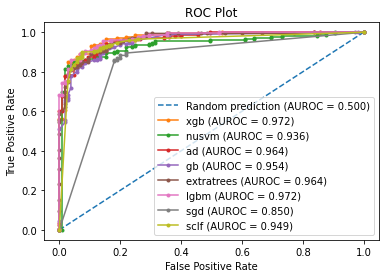

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='xgb (AUROC = %0.3f)' % xgb_auc)
plt.plot(nusvm_fpr, nusvm_tpr, marker='.', label='nusvm (AUROC = %0.3f)' % svm_auc)
plt.plot(ad_fpr, ad_tpr, marker='.', label='ad (AUROC = %0.3f)' % ad_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='gb (AUROC = %0.3f)' % gb_auc)
plt.plot(extratrees_fpr, extratrees_tpr, marker='.', label='extratrees (AUROC = %0.3f)' % ext_auc)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='lgbm (AUROC = %0.3f)' % lgd_auc)
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='sgd (AUROC = %0.3f)' % sgd_auc)
plt.plot(sclf_fpr, sclf_tpr, marker='.', label='sclf (AUROC = %0.3f)' % sclf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()